In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from MCMC import MCMCModel

In [2]:
t = np.linspace(0, 10, 100)

model = MCMCModel(t)

# true_a, true_v, _ = model.fit_with_noise(0, 10, -5, 5, 100, 0.1)

a_range = (-2, 2)
v_range = (-4, 4)
num_iterations = 10000
noise_amplitude = 0.001

samples = model.metropolis_hastings(a_range, v_range, num_iterations, noise_amplitude)

i = 0

for sample in samples:
    current_a, current_v = sample
    acceptance_status = "Accepted"
    
    if i > 0:
        previous_a, previous_v = samples[i - 1]
        
        if current_a == previous_a and current_v == previous_v:
            acceptance_status = "Rejected (same as previous)"

    print(f"Trial {i+1}: a = {current_a}, v = {current_v} ({acceptance_status})")
    
    i += 1

Trial 1: a = -1.8173919987917864, v = -1.4184502233167153 (Accepted)
Trial 2: a = -0.3270487213137776, v = -2.874646039833488 (Accepted)
Trial 3: a = -0.9155506308302575, v = -0.5651462716303062 (Accepted)
Trial 4: a = 1.1199913471917755, v = -3.1167694700859876 (Accepted)
Trial 5: a = 1.1199913471917755, v = -3.1167694700859876 (Rejected (same as previous))
Trial 6: a = 1.1199913471917755, v = -3.1167694700859876 (Rejected (same as previous))
Trial 7: a = 1.1199913471917755, v = -3.1167694700859876 (Rejected (same as previous))
Trial 8: a = 0.29097497792347715, v = 1.9653927414716321 (Accepted)
Trial 9: a = 0.5682178579290755, v = -3.077234392996848 (Accepted)
Trial 10: a = 1.2493894647955588, v = 3.3761379055755594 (Accepted)
Trial 11: a = -0.060466939588827984, v = 1.8647461073597915 (Accepted)
Trial 12: a = 0.6605074800842883, v = -2.2162116006893724 (Accepted)
Trial 13: a = 0.6605074800842883, v = -2.2162116006893724 (Rejected (same as previous))
Trial 14: a = 0.6605074800842883, 

In [3]:
samples_array = np.array(samples)

In [4]:
v_samples = samples_array[:,1]
a_samples = samples_array[:,0]

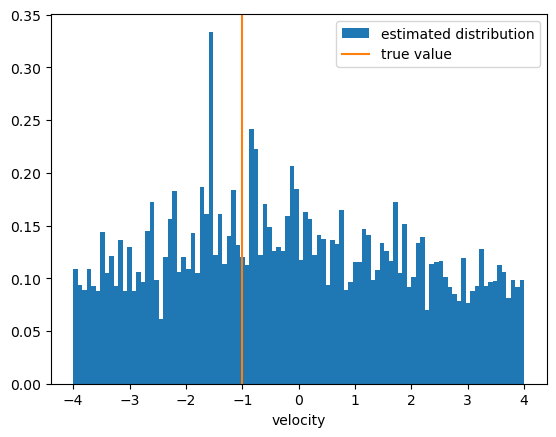

In [5]:
plt.hist(v_samples, 100, density=True, label = "estimated distribution")
plt.xlabel("velocity")
ylim = plt.ylim()
yx =plt.gca()
plt.plot([-1,-1], ylim, label = "true value")
yx.set_ylim(ylim)
plt.legend()

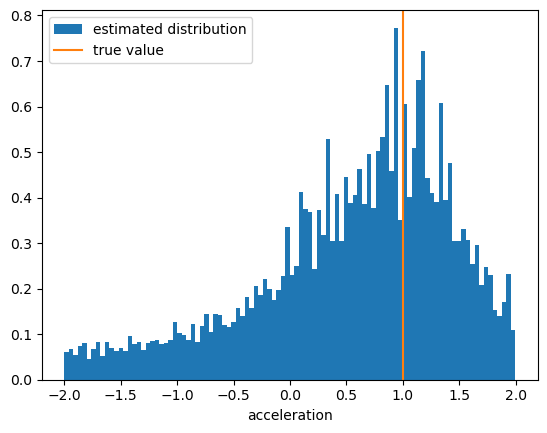

In [6]:
plt.hist(a_samples, 100, density=True, label = "estimated distribution")
plt.xlabel("acceleration")
ylim = plt.ylim()
ax = plt.gca()
plt.plot([1,1], ylim, label = "true value")
ax.set_ylim(ylim)
plt.legend()

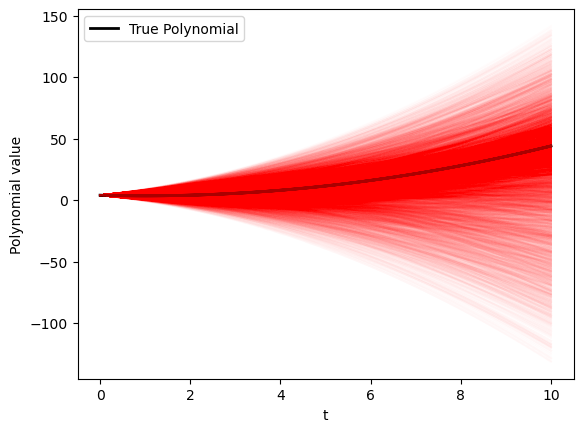

In [7]:
true_polynomial = model.polynomial(v=-1, a=1)
plt.plot(t, true_polynomial, label='True Polynomial', color='black', linewidth=2)

for sample in samples:
    current_a, current_v = sample
    plt.plot(t, model.polynomial(v=current_v, a=current_a), "r-", alpha=0.01)

plt.xlabel('t')
plt.ylabel('Polynomial value')
plt.legend()
plt.show()


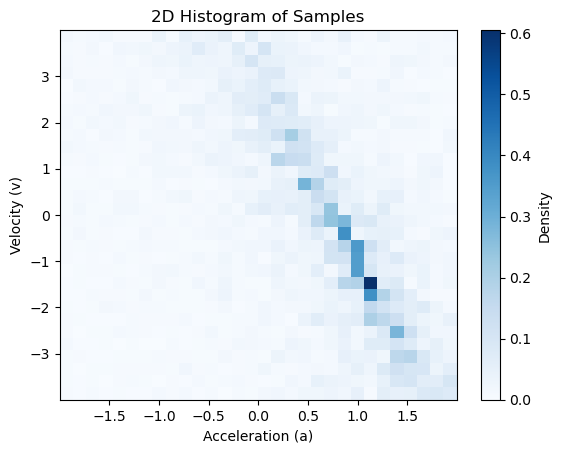

In [8]:
plt.figure()
plt.hist2d(a_samples, v_samples, bins=30, density=True, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Acceleration (a)')
plt.ylabel('Velocity (v)')
plt.title('2D Histogram of Samples')
plt.show()

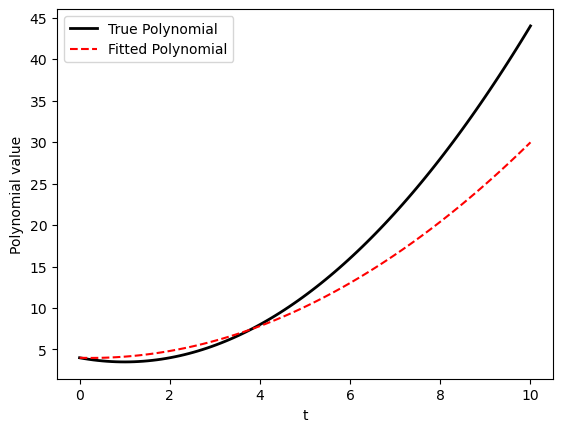

In [10]:
all_t = np.tile(t, len(samples))
all_f = np.hstack([model.polynomial(v=sample[1], a=sample[0]) for sample in samples])
degree = 3
fitted_poly = Polynomial.fit(all_t, all_f, degree)

'''
Creating all_t with np.tile(t, len(samples)):

np.tile(t, len(samples)) repeats the array t (which represents the time points) len(samples) times.
This creates a long array where the time points are repeated for each sample.
For example, if t = [0, 1, 2] and len(samples) = 3, then np.tile(t, 3) results in [0, 1, 2, 0, 1, 2, 0, 1, 2].
Creating all_f with np.hstack([model.polynomial(v=sample[1], a=sample[0]) for sample in samples]):

This list comprehension generates the polynomial values for each sample's (a, v) parameters.
model.polynomial(v=sample[1], a=sample[0]) computes the polynomial values for a given a and v sample.
np.hstack(...) concatenates these polynomial values into a single long array.
For example, if model.polynomial(v, a) returns [y0, y1, y2] for each sample, and there are three samples, then np.hstack(...) results in [y0_1, y1_1, y2_1, y0_2, y1_2, y2_2, y0_3, y1_3, y2_3].
Fitting a polynomial with Polynomial.fit(all_t, all_f, degree):

Polynomial.fit(all_t, all_f, degree) fits a polynomial of a specified degree to the data points (all_t, all_f).
all_t represents the combined time points for all samples.
all_f represents the combined polynomial values for all samples.
The function returns a fitted polynomial that best matches the data.
'''

plt.plot(t, true_polynomial, label='True Polynomial', color='black', linewidth=2)
plt.plot(t, fitted_poly(t), label='Fitted Polynomial', color='red', linestyle='--')
plt.xlabel('t')
plt.ylabel('Polynomial value')
plt.legend()
plt.show()